# 3.1 
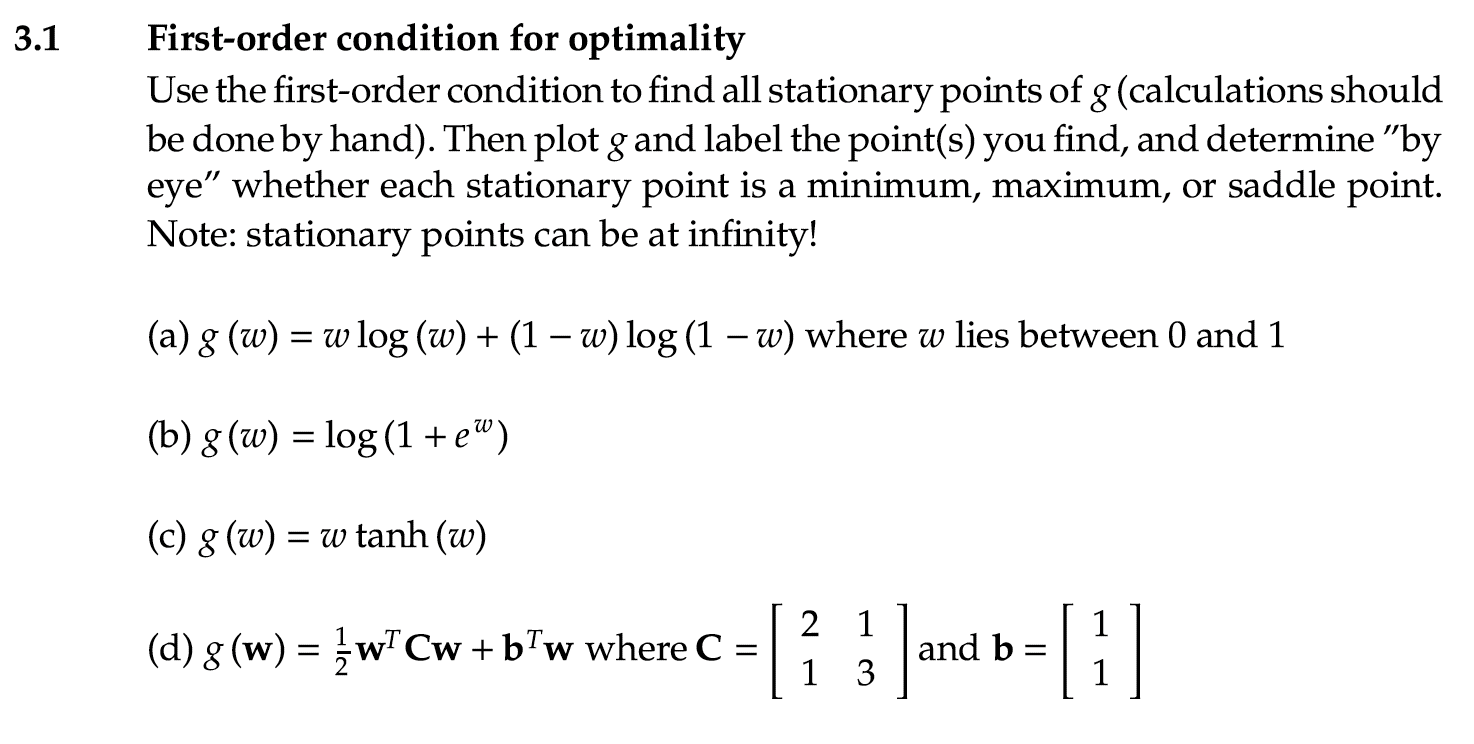

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

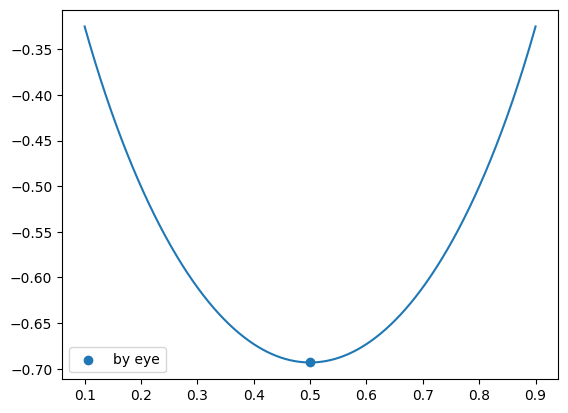

In [11]:
# (a)
x = np.linspace(0.1,0.9,1000)
def g_a(w):
    return w*np.log(w) + (1-w)*np.log(1-w)
plt.plot(x,g_a(x))
plt.scatter(0.5, g_a(0.5), label='by eye')
plt.legend()

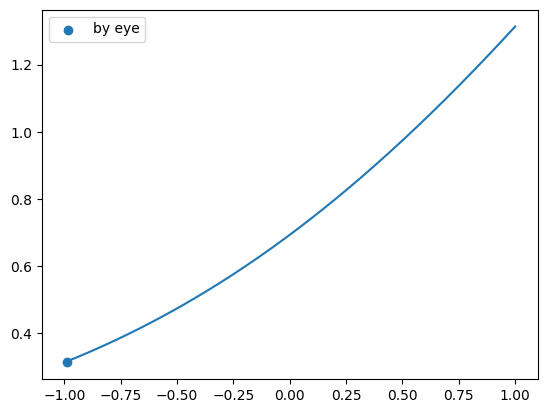

In [17]:
# (b)
x = np.linspace(-1,1,1000)
def g_b(w):
    return np.log(1+np.exp(w))
plt.plot(x,g_b(x))
plt.scatter(-0.99, g_b(-0.99), label='by eye')
plt.legend()

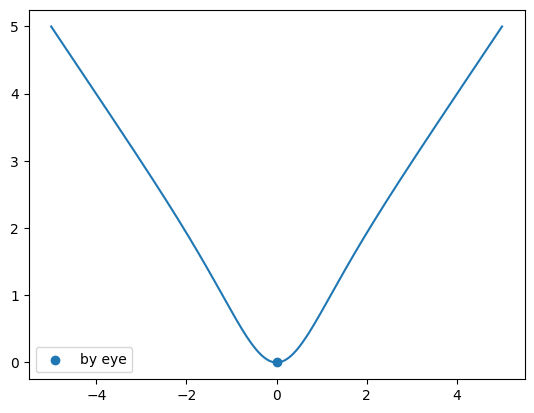

In [19]:
# (c)
x = np.linspace(-5,5,1000)
def g_c(w):
    return w * np.tanh(w)
plt.plot(x,g_c(x))
plt.scatter(0, g_c(0), label='by eye')
plt.legend()

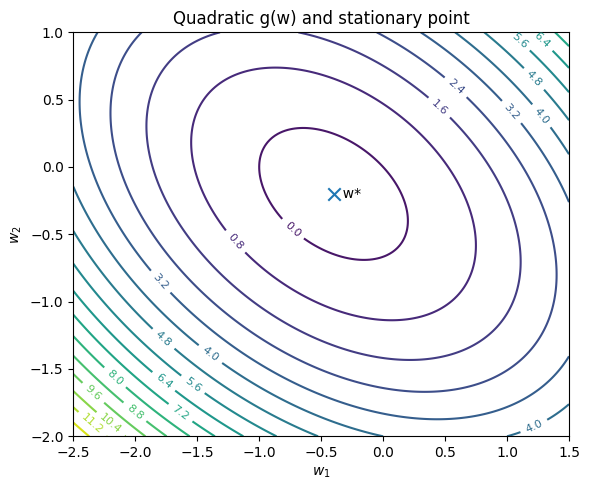

w* = [-0.4 -0.2]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

C = np.array([[2.0, 1.0],
              [1.0, 3.0]])
b = np.array([1.0, 1.0])

# stationary point w* = -C^{-1} b
w_star = -np.linalg.solve(C, b)

def g(w1, w2):
    W = np.stack([w1, w2], axis=-1)
    quad = 0.5 * np.einsum('...i,ij,...j', W, C, W)
    lin  = np.einsum('i,...i', b, W)
    return quad + lin

x = np.linspace(-2.5, 1.5, 200)
y = np.linspace(-2.0, 1.0, 200)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

plt.figure(figsize=(6,5))
cs = plt.contour(X, Y, Z, levels=20)
plt.clabel(cs, inline=True, fontsize=8)

plt.scatter([w_star[0]], [w_star[1]], marker='x', s=80)
plt.text(w_star[0], w_star[1], "  w*", va='center')
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.title("Quadratic g(w) and stationary point")
plt.tight_layout()
plt.show()

print("w* =", w_star)


# 3.2 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114230744.png)

$$
\begin{aligned}
& g'(w)=2\bold{C}\bold{w}+\bold{b}=\frac{2}{\beta}\bold{w}+\bold{b}=0 \\
& \bold{w}=-\frac{\beta}{2}\bold{b}
\end{aligned}
$$

# 3.3 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114230835.png)

$\bold{w}$ must be the eigenvector of $\bold{C}$

# 3.4 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114231617.png)

# 3.5 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114231945.png)

In [26]:
from autograd import grad
from autograd import numpy as np 
import matplotlib.pyplot as plt

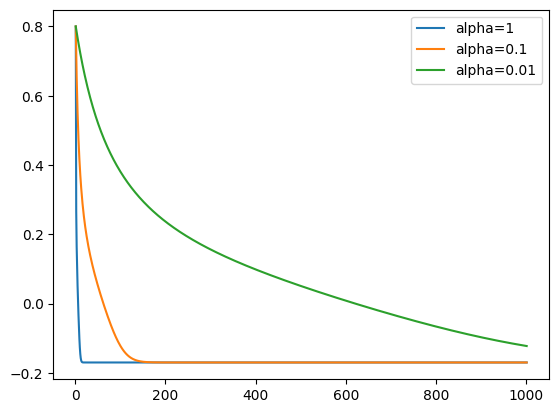

In [37]:
def g(w):
    return 1/50 * (w**4 + w**2 + 10*w)

def gradient_descent(g, alpha, max_iter, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]

    for i in range(max_iter):
        grad_val = gradient(w)
        w = w - alpha * grad_val 
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

w_0 = np.array([2.0])
max_iter = 1000
alpha_list = [1,1e-1,1e-2]
for alpha in alpha_list:
    weight_history, cost_history = gradient_descent(g,alpha, max_iter, w_0)
    plt.plot(np.arange(1,len(cost_history)+1), cost_history, label=f'alpha={alpha}')
    plt.legend()

# 3.6 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114233339.png)

In [38]:
from autograd import grad 
from autograd import numpy as np 
import matplotlib.pyplot as plt 

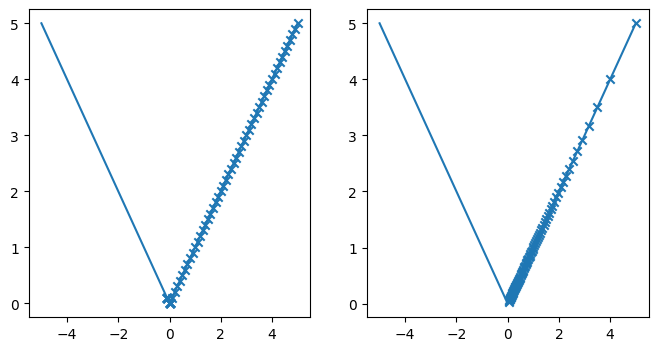

In [64]:
def g(w):
    return abs(w)

def gradient_descent(g, alpha, max_iter, w):
    weight_history = [w]
    cost_history = [g(w)]
    gradient = grad(g)

    for i in range(max_iter):
        grad_eval = gradient(w)
        if isinstance(alpha, str):
            step = 1/(i+1)
        else:
            step = alpha
        w = w - step * grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    
    return weight_history, cost_history

w_0 = np.array([5.0])
alpha = [0.1,'diminish']
max_iter = 80
fig, axes = plt.subplots(1,2, figsize=(8,4))
for ax, alpha in zip(axes.ravel(), alpha_list):
    weight_history, cost_history = gradient_descent(g, alpha, max_iter,w_0)
    x = np.linspace(-5,5,1000)
    y = g(x)
    ax.plot(x,y,label='$g(w)=|w|$')
    ax.scatter(weight_history, cost_history, marker='x')

# 3.7 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114235017.png)  
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114235038.png)

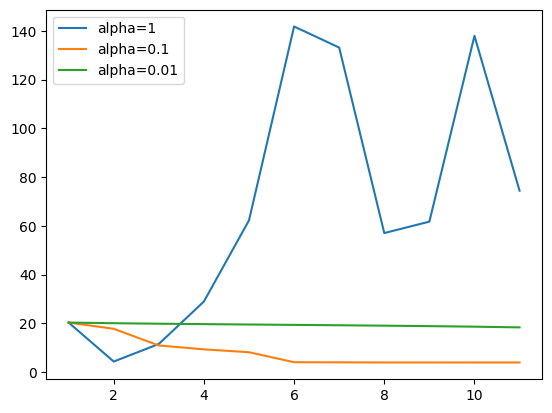

In [ ]:

from autograd import grad 
from autograd import numpy as np 
import matplotlib.pyplot as plt 

def g(w):
    return w[...,0]**2 + w[...,1]**2+2*np.sin(1.5*(w[...,0]+w[...,1]))**2+2

def gradient_descent(g, alpha, max_iter, w):
    weight_history = [w]
    cost_history = [g(w)]
    gradient = grad(g)

    for i in range(max_iter):
        grad_eval = gradient(w)
        if isinstance(alpha, str):
            step = 1/(i+1)
        else:
            step = alpha
        w = w - step * grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    
    return weight_history, cost_history

w_0 = np.array([[3.0, 3.0]])
max_iter = 10
alpha_list = [1,1e-1,1e-2]
for alpha in alpha_list:
    weight_history, cost_history = gradient_descent(g,alpha, max_iter, w_0)
    plt.plot(np.arange(1,len(cost_history)+1), cost_history, label=f'alpha={alpha}')
    plt.legend()

# 3.8 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251115000014.png)

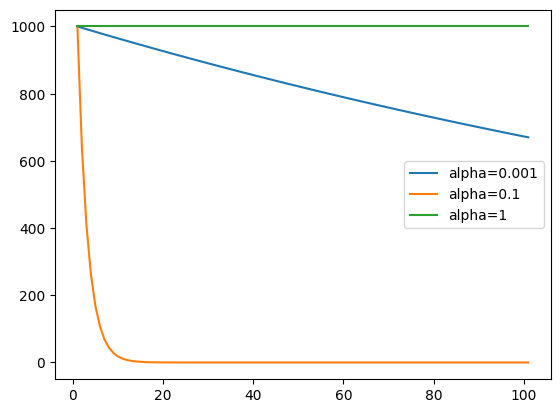

In [82]:
from autograd import grad 
from autograd import numpy as np 
import matplotlib.pyplot as plt 

def g(w):
    return w.T@w

def gradient_descent(g, alpha, max_iter, w):
    weight_history = [w]
    cost_history = [g(w)]
    gradient = grad(g)

    for i in range(max_iter):
        grad_eval = gradient(w)
        if isinstance(alpha, str):
            step = 1/(i+1)
        else:
            step = alpha
        w = w - step * grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    
    return weight_history, cost_history

N = 10
scale = 10
w_0 = scale * np.ones((N,1))
alpha_list = [1e-3,1e-1,1]
max_iter = 100
for alpha in alpha_list:
    weight_history, cost_history = gradient_descent(g,alpha, max_iter, w_0)
    cost_history = np.array(cost_history).reshape(-1)
    plt.plot(np.arange(1,len(cost_history)+1), cost_history, label=f'alpha={alpha}')
    plt.legend()

# 3.9 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251115000629.png)

# 3.10 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251115001359.png)

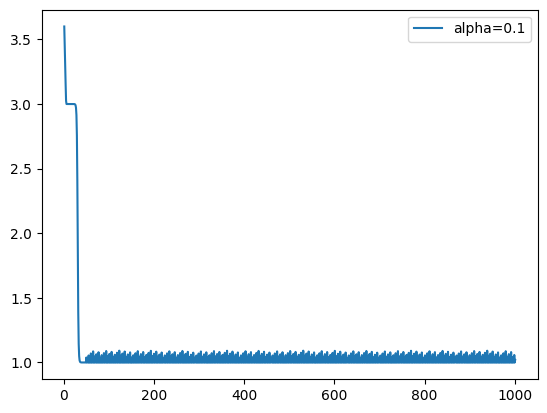

In [90]:
from autograd import grad 
from autograd import numpy as np 
import matplotlib.pyplot as plt 

def g(w):
    return np.tanh(4*w[...,0] + 4*w[...,1])+np.maximum(1,0.4*w[...,0]**2) + 1

def gradient_descent(g, alpha, max_iter, w):
    weight_history = [w]
    cost_history = [g(w)]
    gradient = grad(g)

    for i in range(max_iter):
        grad_eval = gradient(w)
        if isinstance(alpha, str):
            step = 1/(i+1)
        else:
            step = alpha
        w = w - step * grad_eval / np.linalg.norm(grad_eval)
        # w = w - step * grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    
    return weight_history, cost_history

w_0 = np.array([[2.0,2.0]])
alpha_list = [0.1]
max_iter = 1000
for alpha in alpha_list:
    weight_history, cost_history = gradient_descent(g,alpha, max_iter, w_0)
    cost_history = np.array(cost_history).reshape(-1)
    plt.plot(np.arange(1,len(cost_history)+1), cost_history, label=f'alpha={alpha}')
    plt.legend()